In [29]:
%load_ext autoreload
%autoreload 2

from scripts import helper_scripts as sga
from scripts import testing_utils as tu
from scripts.uGLAD import main as uG
from scripts.helper_scripts import process_table, get_partial_correlations, precision_empty, uGLAD_graph
from analytics_utils import get_partial_correlations_from_graph, set_node_attributes

In [1]:
import numpy as np
import pandas as pd

In [12]:
file = "/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes.NODE.paper.tab"

fh = open(file, "r")
index = 0
vocab = {}
data = pd.DataFrame()
while 1:
	line = fh.readline()
	if not line:
		break
	index += 1
	if index < 3:
		continue
	datapoint = {}
	fields = line.split('\t')
	datapoint['paperID'] = int(fields[0])
	datapoint['label'] = int(fields[1][-1])
	for f in fields[2:-1]:
		word, freq = f.split('=')
		datapoint[word] = freq
		vocab[word] = 1
	# data = data.append(datapoint, ignore_index=True)
	# if index % 100 == 0:
	# 	print(index)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [15]:
print(vocab)

{'w-rat': 1, 'w-common': 1, 'w-use': 1, 'w-examin': 1, 'w-pathogenesi': 1, 'w-retinopathi': 1, 'w-mous': 1, 'w-studi': 1, 'w-anim': 1, 'w-model': 1, 'w-metabol': 1, 'w-abnorm': 1, 'w-contribut': 1, 'w-develop': 1, 'w-investig': 1, 'w-mice': 1, 'w-2': 1, 'w-month': 1, 'w-compar': 1, 'w-obtain': 1, 'w-method': 1, 'w-induc': 1, 'w-6': 1, 'w-inject': 1, 'w-experiment': 1, 'w-normal': 1, 'w-diet': 1, 'w-30': 1, 'w-hyperglycemia': 1, 'w-level': 1, 'w-lipid': 1, 'w-oxid': 1, 'w-activ': 1, 'w-protein': 1, 'w-kinas': 1, 'w-c': 1, 'w-measur': 1, 'w-result': 1, 'w-increas': 1, 'w-retin': 1, 'w-stress': 1, 'w-3': 1, 'w-similar': 1, 'w-observ': 1, 'w-conclus': 1, 'w-play': 1, 'w-import': 1, 'w-role': 1, 'w-present': 1, 'w-p': 1, 'w-m': 1, 'w-r': 1, 'w-muscl': 1, 'w-control': 1, 'w-chang': 1, 'w-dure': 1, 'w-lower': 1, 'w-higher': 1, 'w-mass': 1, 'w-correl': 1, 'w-decreas': 1, 'w-determin': 1, 'w-concentr': 1, 'w-stimul': 1, 'w-period': 1, 'w-caus': 1, 'w-mark': 1, 'w-group': 1, 'w-evid': 1, 'w-fast

In [20]:
file = "/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes.NODE.paper.tab"

fh = open(file, "r")
index = 0
column_list = list(vocab.keys())
column_list.append("paperID")
column_list.append("label")
# print (column_list)
data = pd.DataFrame(columns = column_list)
while 1:
	line = fh.readline()
	if not line:
		break
	index += 1
	if index < 3:
		continue
	datapoint = {}
	fields = line.split('\t')
	datapoint['paperID'] = int(fields[0])
	datapoint['label'] = int(fields[1][-1])
	for f in fields[2:-1]:
		word, freq = f.split('=')
		datapoint[word] = freq
	for v in vocab:
		if v not in datapoint:
			datapoint[v] = 0.0
	data = data.append(datapoint, ignore_index=True)
	if index % 100 == 0:
		print(index)

['w-rat', 'w-common', 'w-use', 'w-examin', 'w-pathogenesi', 'w-retinopathi', 'w-mous', 'w-studi', 'w-anim', 'w-model', 'w-metabol', 'w-abnorm', 'w-contribut', 'w-develop', 'w-investig', 'w-mice', 'w-2', 'w-month', 'w-compar', 'w-obtain', 'w-method', 'w-induc', 'w-6', 'w-inject', 'w-experiment', 'w-normal', 'w-diet', 'w-30', 'w-hyperglycemia', 'w-level', 'w-lipid', 'w-oxid', 'w-activ', 'w-protein', 'w-kinas', 'w-c', 'w-measur', 'w-result', 'w-increas', 'w-retin', 'w-stress', 'w-3', 'w-similar', 'w-observ', 'w-conclus', 'w-play', 'w-import', 'w-role', 'w-present', 'w-p', 'w-m', 'w-r', 'w-muscl', 'w-control', 'w-chang', 'w-dure', 'w-lower', 'w-higher', 'w-mass', 'w-correl', 'w-decreas', 'w-determin', 'w-concentr', 'w-stimul', 'w-period', 'w-caus', 'w-mark', 'w-group', 'w-evid', 'w-fast', 'w-type', 'w-signific', 'w-differ', 'w-ratio', 'w-suggest', 'w-degre', 'w-occur', 'w-vivo', 'w-respect', 'w-dysfunct', 'w-region', 'w-high', 'w-appear', 'w-sever', 'w-affect', 'w-cardiovascular', 'w-compl

In [21]:
data.shape

(19717, 502)

In [22]:
data.to_csv("/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes.csv", index=None)

In [44]:
data = pd.read_csv("/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes.csv")

In [45]:
paper_cat = data[["paperID", "label"]].copy(deep=True)

In [46]:
paper_cat.head()

,paperID,label
0,12187484,1
1,2344352,1
2,14654069,1
3,16443886,2
4,2684155,1


In [47]:
paper_cat.shape

(19717, 2)

In [48]:
del data['label']
data = data.set_index('paperID').transpose(copy=True)
data.head()

paperID,12187484,2344352,14654069,16443886,2684155,15032912,17988185,9834350,16230722,3542527,...,6714535,1727730,3311856,17508911,2185105,17559889,8792097,17934141,18673544,18564175
w-rat,0.093935,0.023618,0.102263,0.0,0.030616,0.116897,0.000000,0.0,0.000000,0.00000,...,0.071881,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.067942,0.00000,0.17505
w-common,0.028698,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.010479,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000
w-use,0.011760,0.014784,0.010669,0.0,0.000000,0.000000,0.007445,0.0,0.004294,0.02797,...,0.000000,0.011128,0.0,0.000000,0.000000,0.022998,0.0,0.014177,0.00924,0.00000
w-examin,0.019375,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.023681,0.013425,0.000000,0.0,0.000000,0.00000,0.00000
w-pathogenesi,0.063161,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000


In [49]:
data.to_csv("/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes-words.csv", index=None)
paper_cat.to_csv("/mnt/d/Work/data/Pubmed diabetes/Pubmed-Diabetes/data/Pubmed-Diabetes-labels.csv", index=None)

# Create a uGLAD graph

In [50]:
columns = data.columns
table = process_table(data[columns[300:600]], NORM='min_max', COND_NUM=np.inf, eigval_th=1e-3, msg='')  # np.inf

: Processing the input table for basic compatibility check
: The input table has sample 500 and features 300
: Total zero samples dropped 0
: Single value columns dropped: total 0, columns []
Input covariance matrix: The condition number 870.0864389962564 and min eig 0.00015216289383388962 max eig 0.13239487044329445
: Duplicates dropped: total 0, columns []
: Low Variance columns dropped: min variance 0.0,    total 0, columns []
Processed covariance matrix: The condition number 870.0864389962564 and min eig 0.00015216289383388962 max eig 0.13239487044329445
: The processed table has sample 500 and features 300
: Total time to process the table 0.138 secs


In [63]:
EPOCHS = 3000

model = uG.uGLAD_GL()  

# Fit to the data
model.fit(
    	table,
    	centered=False,
		epochs=EPOCHS,
	    lr=0.001, # decrease if you get NaNs
	    INIT_DIAG=0,
    	L=15, #5
	    verbose=True,  # True if in debug mode
    	k_fold=0,  # Direct mode
    	mode='direct'  # Modes = direct/cv/missing
    )  

print(f'Final loss value {model.final_loss, np.isnan(model.final_loss)}')
print(f'precision matrix: {model.precision_}')

Running uGLAD
Direct Mode
epoch:0/3000 loss:-456.8819580078125
epoch:300/3000 loss:-662.765869140625
epoch:600/3000 loss:-840.5967407226562
epoch:900/3000 loss:-1155.4681396484375
epoch:1200/3000 loss:-1199.3756103515625
epoch:1500/3000 loss:-1285.717041015625
epoch:1800/3000 loss:-1219.99072265625
epoch:2100/3000 loss:-1223.782958984375
epoch:2400/3000 loss:-1235.854248046875
epoch:2700/3000 loss:-1256.66845703125
Total runtime: 814.5147013664246 secs

Final loss value (array(-1268.2118, dtype=float32), False)
precision matrix: [[454.6103     -10.426914    -1.5479336  ...   0.4915067   14.891489
   -2.349194  ]
 [-10.426924   257.7572       4.4512334  ...   3.8215249   -5.545078
    0.        ]
 [ -1.5479296    4.451205   431.4611     ...   9.402458     0.
   24.677069  ]
 ...
 [  0.49149948   3.8214743    9.402447   ...  87.47801     -0.
   -0.        ]
 [ 14.891466    -5.545074     0.         ...  -0.         199.23993
   -6.898377  ]
 [ -2.3491757    0.          24.677042   ...  -0

In [64]:
if np.isnan(model.final_loss):
    print(f'Model did not converge, loss is {model.final_loss}')
elif precision_empty(model.precision_):
    print("LEARNED PRECISION MATRIX INDICATES NO CORRELATIONS.\n\n")

DA: number of nonzero entries in upper triangular precision matrix is 37283


In [65]:
SPARSITY = 1
CORRELATION_TYPE = "both"
DESCRIPTION = "Paper word content graph"

partial_correlations = get_partial_correlations(model.precision_)

G, G_image_bytes, G_graph_edge_list = uGLAD_graph(
                    table,
                    partial_correlations, 
                    SPARSITY, 
                    CORRELATION_TYPE,
                    title=DESCRIPTION,
                    fig_size=20,
                    save_file='cora_correlation_graph.png',
                    #plot_edge_labels=False
                )

Number of nonzero entries in upper triangular precision matrix is 37283
Sparsity 1 using threshold 0.0
We have 37283 edges


In [66]:
import pickle

with open("pubmed_graph.pkl", 'wb') as fh:
	pickle.dump(G, fh)

with open("pubmed_edges.pkl", 'wb') as fh:
	pickle.dump(G_graph_edge_list, fh)

In [ ]:
import pickle

fh = open("pubmed_graph.pkl", "rb")
G = pickle.load(fh)
fh = open("pubmed_edges.pkl", "rb")
G_graph_edge_list = pickle.load(fh)

In [43]:
paper_cat.head()

,paperID,label
0,12187484,1
1,2344352,1
2,14654069,1
3,16443886,2
4,2684155,1


We have 300 known attributes out of 300 nodes
Known values belong to the following 3 classes: {1, 2, 3}
We will be testing the following masked settings: range(1, 226)
norm KL max_iter 20
Running the analytical method
Accuracy at 60: 0.6176666666666667 accuracy at 120: 0.5985 accuracy at 180 0.5532222222222223


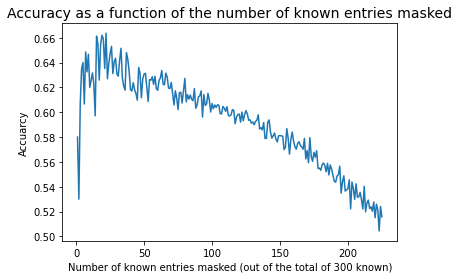

In [77]:
# Get the precision matrix from the recovered sparse graph
theta = get_partial_correlations_from_graph(G)

# creating the node attribute dictionary
unknown_cat = 'not available'

node_attribute_dict = {n:unknown_cat for n in G.nodes()}

# setting the known classes
node_attribute_known = {}
attribute_values = {}
for n in G.nodes:
    # print(paper_cat[paper_cat['paperID']==n])
    attr = paper_cat[paper_cat['paperID']==n].label.iloc[0]
    node_attribute_known[n] = attr
    if attr in attribute_values:
        attribute_values[attr] += 1
    else:
        attribute_values[attr] = 1

node_attribute_dict = set_node_attributes(node_attribute_dict, node_attribute_known)
#for a in attribute_values:
#    print(a, attribute_values[a], round(attribute_values[a]/float(len(G.nodes)), 2))
# print(f'Initial node attributes {node_attribute_dict}\n')
num_classes = len(set(node_attribute_dict.values()))
test_num = 50
method = 'iterative'     # 'analytical'  #'iterative'  #'neighbor_vote' 
norm = "KL"  #None  #'KL', 'Wasserstein']:
a = 40
conv_method = "exp"  # "pos", "exp", "posneg"

known_att, known_pos = tu.number_known(node_attribute_dict, unknown_cat)
print(f'We have {known_att} known attributes out of {len(G.nodes)} nodes')
print(f'Known values belong to the following {len(set(node_attribute_dict.values()))} classes: {set(node_attribute_dict.values())}')
masked_counts = range (1, 3*int(known_att/4)+1)  #3*int(known_att/4)+1)
print(f'We will be testing the following masked settings: {masked_counts}')

results = []
# for a in [1]:  #[0.1, 0.3, 0.5, 0.8, 1, 2, 5, 10, 20, 30]:
for norm in [None, "KL", "Wasserstein"]:
# for alpha in [35]:
    results_norm = []
    for iter in [20]:  #, 30, 40, 50, 60, 70, 80, 90, 100]:
        print("conv_method", conv_method, "norm", norm, "max_iter", iter, "alpha", alpha)  
        accuracy = tu.run_tests(theta, method, node_attribute_dict, masked_counts, unknown_cat, test_num, alpha=a, conv_method=conv_method, norm=norm, max_iter=iter)  
        # accuracy, predDistr = tu.run_tests_confidence(theta, method, node_attribute_dict, masked_counts, unknown_cat, test_num, alpha=a, conv_method="pos", norm=None)
        # print(method, a, norm, conv_method, iter)
        print("Accuracy at 60:", accuracy[59], "accuracy at 120:", accuracy[119], "accuracy at 180", accuracy[179])
        # print(np.array(accuracy).mean(axis=1))
        tu.plot_accuracy_results(accuracy, known_att, masked_counts)   
        # tu.plot_accuracy_by_confidence_results(accuracy, known_att, masked_counts, num_classes)
        results_norm.append(accuracy)
    results.append(results_norm)